## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [6]:
df = pd.read_csv("QueryResults.csv")
df.columns = ['DATE', 'TAG', 'POSTS']

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [11]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,505
4,2008-08-01 00:00:00,c++,164


In [12]:
df.tail()

,DATE,TAG,POSTS
2421,2023-02-01 00:00:00,php,2743
2422,2023-02-01 00:00:00,python,16773
2423,2023-02-01 00:00:00,r,3885
2424,2023-02-01 00:00:00,ruby,348
2425,2023-02-01 00:00:00,swift,1379


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [8]:
df.shape

(2426, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [10]:
df.count()

DATE     2426
TAG      2426
POSTS    2426
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [24]:
tag_category = df.groupby('TAG').sum()
tag_category

,POSTS
TAG,
assembly,42301
c,393405
c#,1581911
c++,788770
delphi,50585
go,67772
java,1887210
javascript,2475719
perl,67518


In [20]:
tag_category.loc[tag_category['POSTS'].idxmax()]

POSTS    2475719
Name: javascript, dtype: int64

Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [23]:
df.groupby('TAG').count()

,DATE,POSTS
TAG,,
assembly,175,175
c,175,175
c#,176,176
c++,175,175
delphi,175,175
go,160,160
java,175,175
javascript,175,175
perl,175,175


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [28]:
print(df['DATE'][1])
print(type(df.DATE[1]))

2008-08-01 00:00:00
<class 'str'>


In [29]:
df.DATE = pd.to_datetime(df.DATE)
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,505
4,2008-08-01,c++,164


## Data Manipulation



In [30]:
test_df = pd.DataFrame({'Age': ['Young', 'Young', 'Young', 'Young', 'Old', 'Old', 'Old', 'Old'],
                        'Actor': ['Jack', 'Arnold', 'Keanu', 'Sylvester', 'Jack', 'Arnold', 'Keanu', 'Sylvester'],
                        'Power': [100, 80, 25, 50, 99, 75, 5, 30]})
print(test_df)

pivoted_df = test_df.pivot(index='Age', columns='Actor', values='Power')
print(pivoted_df)

     Age      Actor  Power
0  Young       Jack    100
1  Young     Arnold     80
2  Young      Keanu     25
3  Young  Sylvester     50
4    Old       Jack     99
5    Old     Arnold     75
6    Old      Keanu      5
7    Old  Sylvester     30
Actor  Arnold  Jack  Keanu  Sylvester
Age                                  
Old        75    99      5         30
Young      80   100     25         50


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [32]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')
reshaped_df.shape

(176, 14)

In [33]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,505.0,164.0,14.0,NaN,222.0,163.0,28.0,158.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,319.0,1642.0,754.0,104.0,NaN,1129.0,634.0,130.0,476.0,536.0,6.0,287.0,NaN
2008-10-01,16.0,302.0,1988.0,807.0,112.0,NaN,1149.0,722.0,128.0,610.0,506.0,NaN,247.0,NaN
2008-11-01,16.0,258.0,1730.0,734.0,141.0,NaN,956.0,580.0,97.0,500.0,450.0,1.0,158.0,NaN


In [34]:
reshaped_df.tail()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2022-10-01,242.0,2005.0,5793.0,3197.0,153.0,738.0,6475.0,14060.0,82.0,3361.0,22033.0,4528.0,436.0,1622.0
2022-11-01,289.0,2185.0,6038.0,3306.0,116.0,750.0,6799.0,14360.0,110.0,3364.0,22896.0,4628.0,466.0,1675.0
2022-12-01,284.0,1865.0,5346.0,2866.0,86.0,632.0,5989.0,12567.0,95.0,2898.0,19355.0,3687.0,395.0,1468.0
2023-01-01,241.0,1515.0,5405.0,2676.0,114.0,740.0,5802.0,12308.0,76.0,3098.0,18123.0,3761.0,374.0,1453.0
2023-02-01,202.0,1353.0,4972.0,2395.0,135.0,701.0,5498.0,10976.0,83.0,2743.0,16773.0,3885.0,348.0,1379.0


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [36]:
list(reshaped_df.columns)

['assembly',
 'c',
 'c#',
 'c++',
 'delphi',
 'go',
 'java',
 'javascript',
 'perl',
 'php',
 'python',
 'r',
 'ruby',
 'swift']

In [38]:
reshaped_df.count()

TAG
assembly      175
c             175
c#            176
c++           175
delphi        175
go            160
java          175
javascript    175
perl          175
php           175
python        175
r             173
ruby          175
swift         167
dtype: int64

In [40]:
reshaped_df.fillna(0, inplace=True)
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,505.0,164.0,14.0,0.0,222.0,163.0,28.0,158.0,120.0,0.0,70.0,0.0
2008-09-01,28.0,319.0,1642.0,754.0,104.0,0.0,1129.0,634.0,130.0,476.0,536.0,6.0,287.0,0.0
2008-10-01,16.0,302.0,1988.0,807.0,112.0,0.0,1149.0,722.0,128.0,610.0,506.0,0.0,247.0,0.0
2008-11-01,16.0,258.0,1730.0,734.0,141.0,0.0,956.0,580.0,97.0,500.0,450.0,1.0,158.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-01,242.0,2005.0,5793.0,3197.0,153.0,738.0,6475.0,14060.0,82.0,3361.0,22033.0,4528.0,436.0,1622.0
2022-11-01,289.0,2185.0,6038.0,3306.0,116.0,750.0,6799.0,14360.0,110.0,3364.0,22896.0,4628.0,466.0,1675.0
2022-12-01,284.0,1865.0,5346.0,2866.0,86.0,632.0,5989.0,12567.0,95.0,2898.0,19355.0,3687.0,395.0,1468.0


In [41]:
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

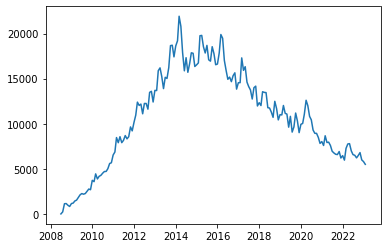

In [46]:
plt.plot(reshaped_df.index, reshaped_df.java)

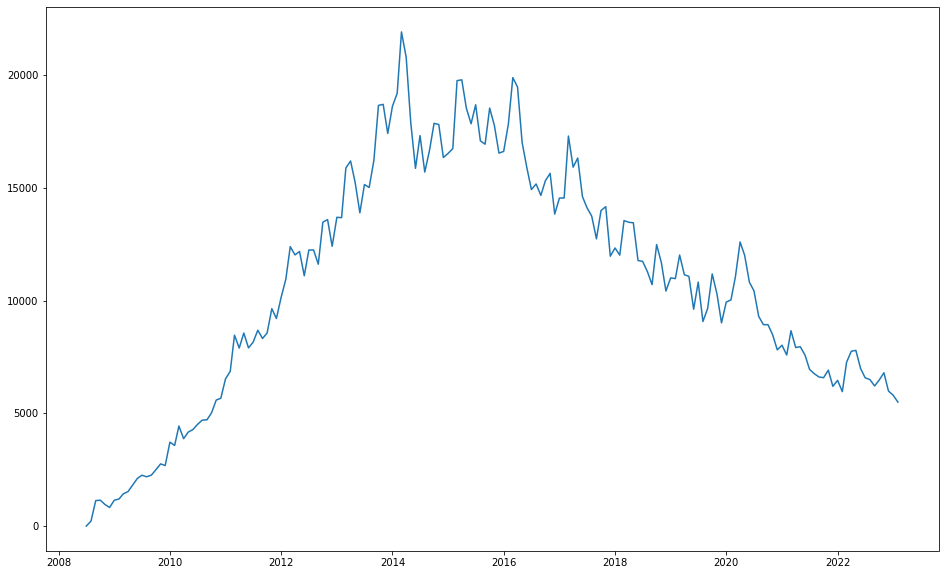

In [47]:
plt.figure(figsize=(16,10))
plt.plot(reshaped_df.index, reshaped_df.java)

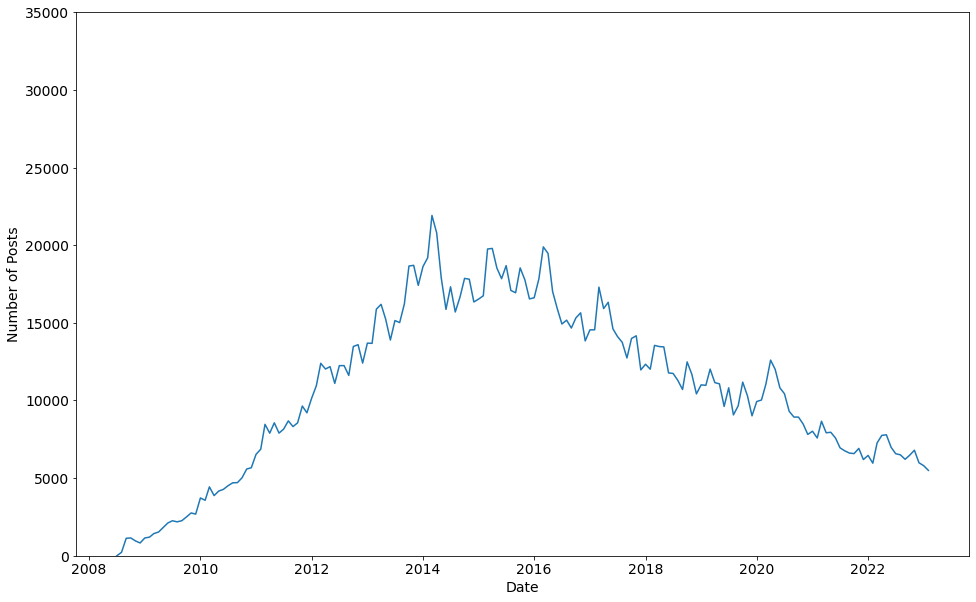

In [50]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df.java)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

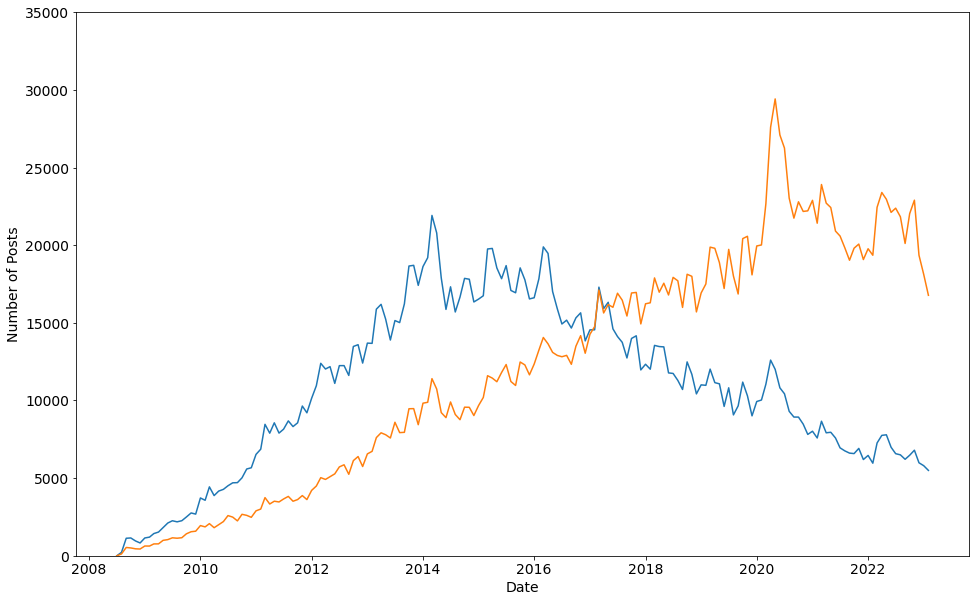

In [59]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

plt.plot(reshaped_df.index, reshaped_df.java)
plt.plot(reshaped_df.index, reshaped_df.python)

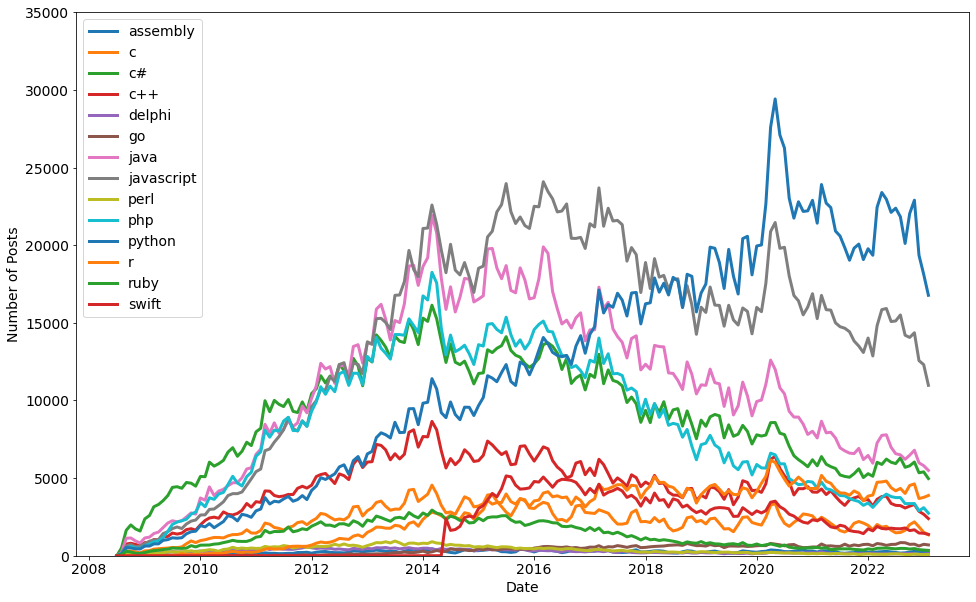

In [63]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], linewidth=3, label=reshaped_df[column].name)

plt.legend(fontsize=14)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

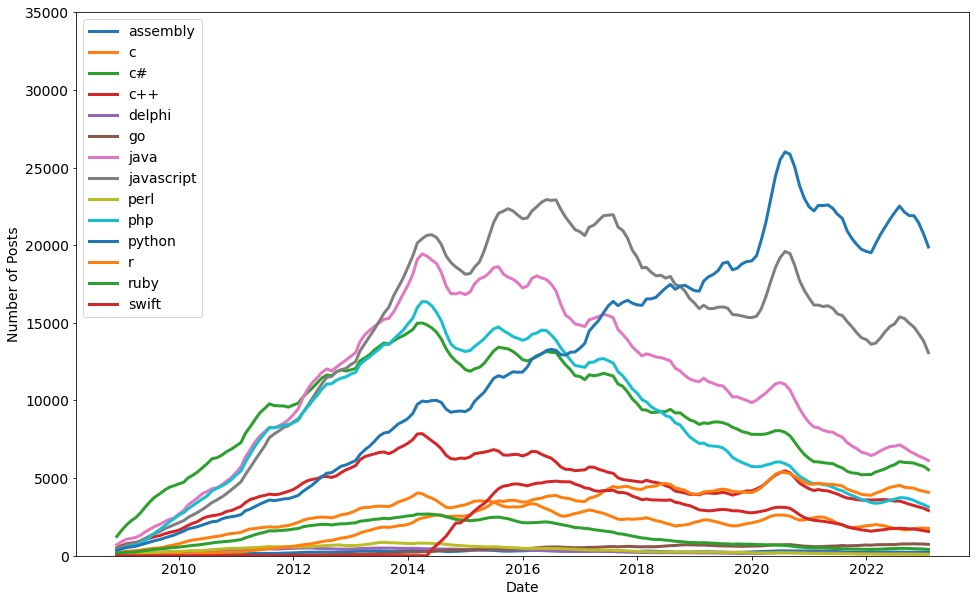

In [71]:
roll_df = reshaped_df.rolling(window=6).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], linewidth=3, label=roll_df[column].name)

plt.legend(fontsize=14)


---


게시물 수를 기준으로 2008년부터 2012년까지 가장 인기 높았던 프로그래밍 언어는?

<BarContainer object of 14 artists>

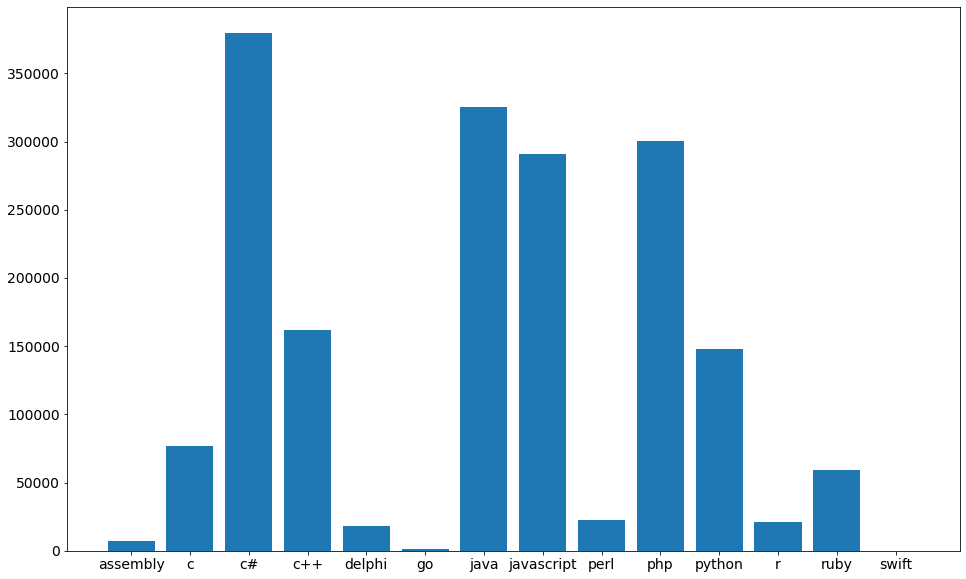

In [108]:
pop_08_12 = reshaped_df.loc["2008-01-01":"2012-12-01"].sum()
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.bar(pop_08_12.index, pop_08_12)

2015년부터 2018년까지 가장 인기가 높았던 프로그래밍 언어는?

<BarContainer object of 14 artists>

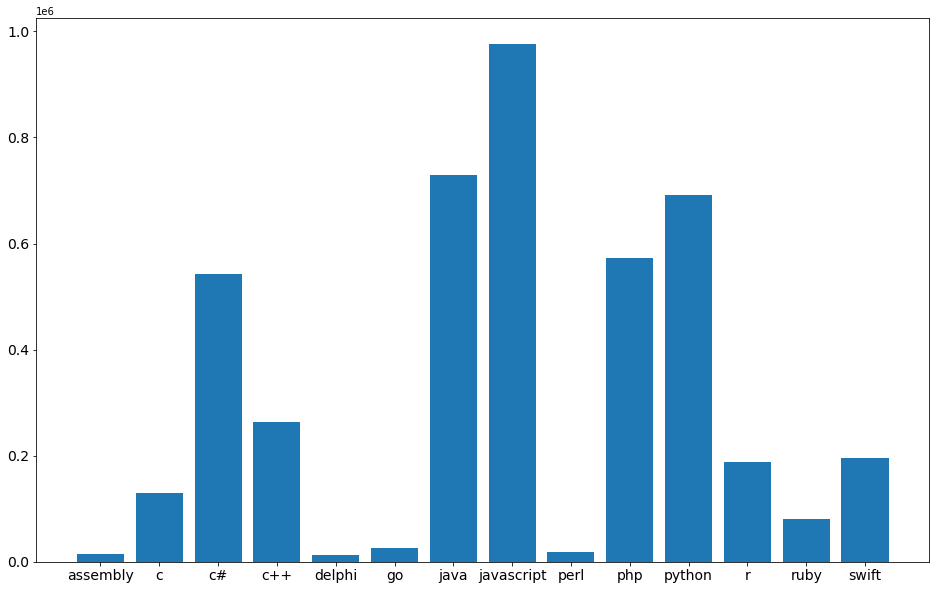

In [109]:
pop_15_18 = reshaped_df.loc["2015-01-01":"2018-12-01"].sum()
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.bar(pop_15_18.index, pop_15_18)

2020년에 가장 인기가 높았던 프로그래밍 언어는?

<BarContainer object of 14 artists>

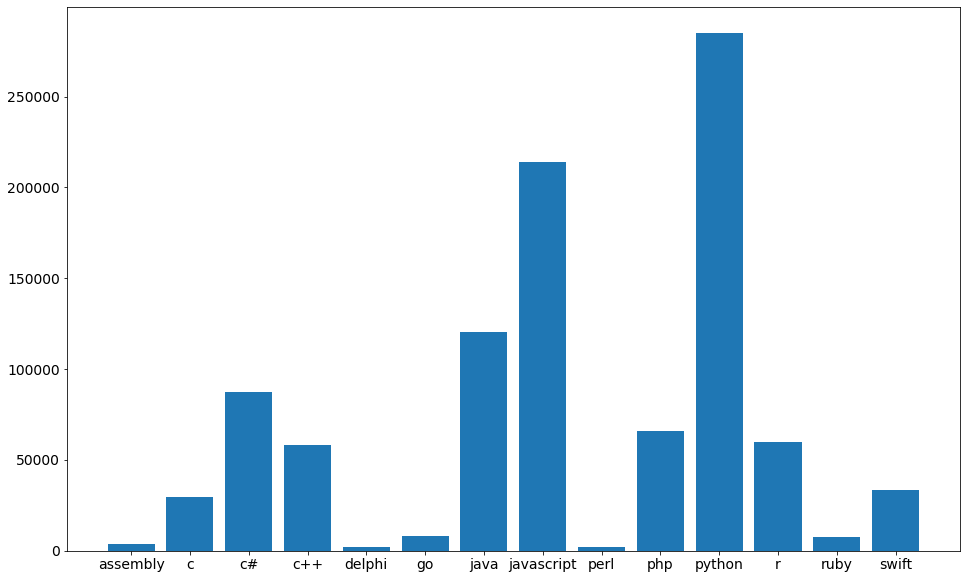

In [111]:
pop_20_20 = reshaped_df.loc["2020-01-01":"2020-12-01"].sum()
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.bar(pop_20_20.index, pop_20_20)

2022년 가장 인기가 높았던 프로그래밍 언어는?

<BarContainer object of 14 artists>

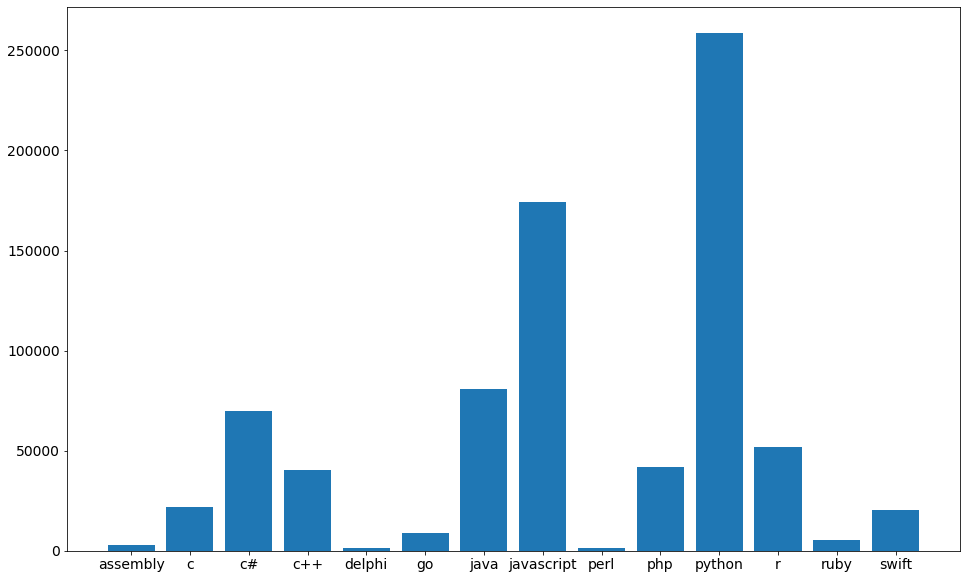

In [112]:
pop_22_22 = reshaped_df.loc["2022-01-01":"2022-12-01"].sum()
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.bar(pop_22_22.index, pop_22_22)